In [22]:
import numpy as np

In [4]:
import modin.pandas as pd

In [5]:
import pandas as old_pd

In [6]:
train_df = pd.read_csv('../data/raw/train.csv')

In [7]:
train_labels_df = pd.read_csv('../data/raw/train_labels.csv')

## Summary plots

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.


In [9]:
sns.set()

In [10]:
train_df = old_pd.DataFrame(train_df.values, columns=train_df.columns)

In [11]:
accuracy_group_counts = train_labels_df.groupby('accuracy_group')['game_session'].count()

To request implementation, send an email to feature_requests@modin.org.


## Check observations over time

In [12]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

In [13]:
train_df['weekday_name'] = train_df['timestamp'].dt.weekday_name

In [14]:
train_df['date'] = train_df['timestamp'].dt.date

In [15]:
train_df['hour'] = train_df['timestamp'].dt.hour

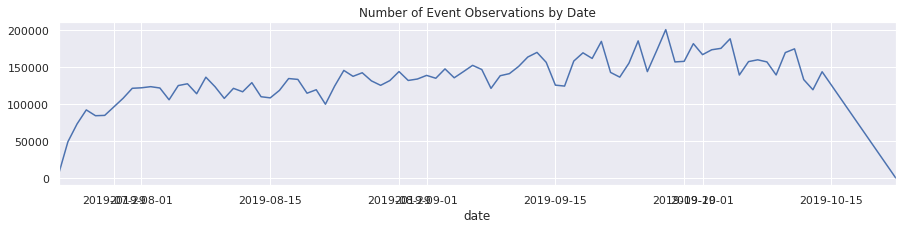

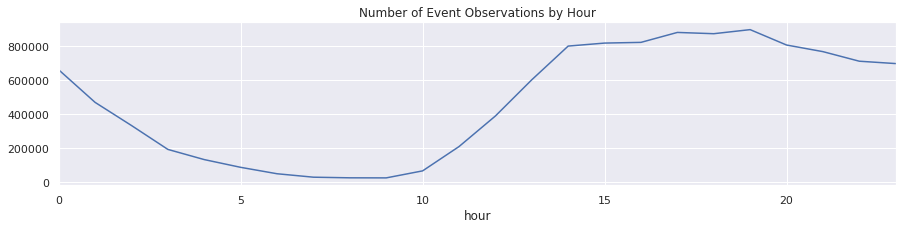

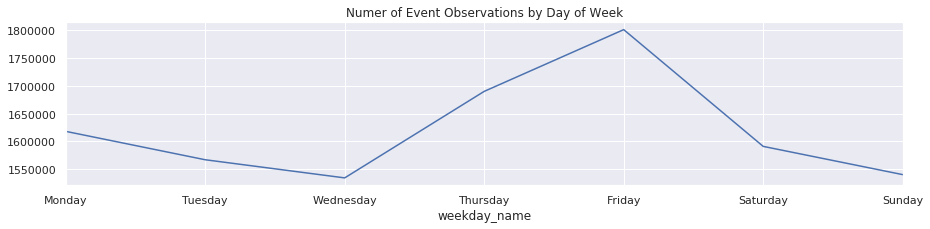

In [21]:
## Modified from https://www.kaggle.com/robikscube/2019-data-science-bowl-an-introduction
train_df.groupby('date')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Number of Event Observations by Date')
plt.show()
train_df.groupby('hour')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Number of Event Observations by Hour')
plt.show()
train_df.groupby('weekday_name')['event_id'] \
    .agg('count').T[['Monday','Tuesday','Wednesday',
                     'Thursday','Friday','Saturday',
                     'Sunday']].T.plot(figsize=(15, 3),
                                       title='Numer of Event Observations by Day of Week')
plt.show()

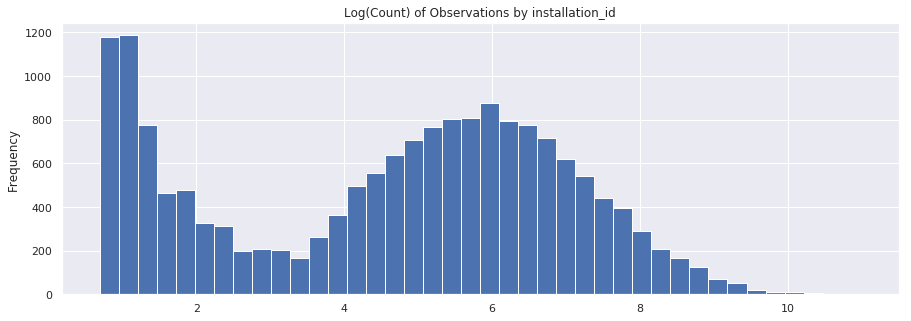

In [18]:
train_df.groupby('installation_id') \
    .count()['event_id'] \
    .apply(np.log1p) \
    .plot(kind='hist',
          bins=40,
         figsize=(15, 5),
         title='Log(Count) of Observations by installation_id')
plt.show()

## Examine labels

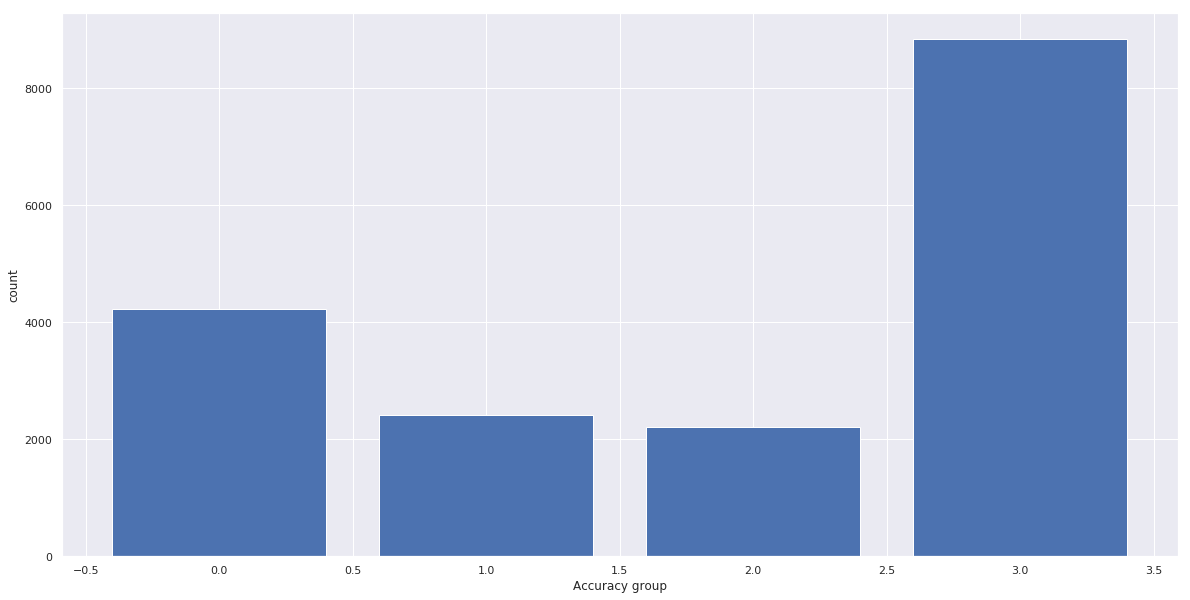

In [19]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(4), accuracy_group_counts)
plt.xlabel('Accuracy group')
plt.ylabel('count')
plt.show()

In [20]:
train_labels_pandas

NameError: name 'train_labels_pandas' is not defined